In [706]:
from pprint import pprint
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import requests.auth
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import os
from matplotlib import offsetbox
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
import re
from gensim import corpora, models, similarities, matutils
import json
from sklearn.manifold import TSNE
import praw
from sklearn.cluster import KMeans
import numpy as np
import pickle
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize          
from sklearn.metrics import silhouette_score
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction import text
from reddit_token import get_token, reddit_instance
from sklearn.decomposition import NMF, TruncatedSVD


In [2]:
#Obtain Reddit Token
get_token()

A reddit token has been created!


In [822]:
def sillhouette_plot(X):
    SSEs = []
    Sil_coefs = []
    for k in range(2,15):
        km = KMeans(n_clusters=k, random_state=17)
        km.fit(X)
        labels = km.labels_
        Sil_coefs.append(silhouette_score(X, labels, metric='euclidean'))
        SSEs.append(km.inertia_) 
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
    k_clusters = range(2,15)
    ax1.plot(k_clusters, Sil_coefs)
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Silhouette Coefficient')
    

# plot here on ax2
    ax2.plot(k_clusters, SSEs)
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('SSE');

In [ ]:
def save_latest(filename, dataset):
    with open('{}.pkl'.format(filename), 'wb') as picklefile:
        pickle.dump(dataset, picklefile)
    return print('Saved {} as {}.pkl'.format(dataset,filename))

In [121]:
def append_new_data(full_df):
    small_df = pd.DataFrame(data=comment_list2, columns=comment_list2.pop(0))
    full_df = (full_df.append(small_df)
               .drop_duplicates()
              .reset_index())
    return full_df
    
    

In [2]:
with open("tokendf.pkl", 'rb') as picklefile: 
    token_df = pickle.load(picklefile)

In [4]:
#Create a Reddit Instance
reddit = reddit_instance()

In [142]:
subreddit = reddit.subreddit('WritingPrompts')

In [151]:
top_subreddit = subreddit.top(limit=None)

In [152]:
comment_list = []
comment_list.append(['post_id','prompt','post_author','post_score','comment_id','comment_author','comment_score','formatted_comment'])
comment_count = 0
subreddit.random()
count = 0
while True:
     for post in top_subreddit:
            if post.id in postid or post.title[0:4]!= '[WP]':
                continue
            else:
                postid.add(post.id)
                comment_count = comment_count + 1
                print('comment #{} scraped'.format(comment_count), reddit.auth.limits)
                post_id = post.id
                post_author = post.author
                post_score = post.score
                prompt = post.title
                for comment in post.comments.list():
                    try:
                        if comment.author in ['[deleted]','[removed]','WritingPromptsRobot',None] or comment.body in ['[deleted]','[removed]',None]:
                            continue
                        else:
                            if comment.score > 100:
                                formatted_comment = comment.body.lower().replace('\n','')
                                comment_author = comment.author
                                comment_score = comment.score
                                comment_id = comment.id
                                comment_list.append([post_id,prompt,post_author,post_score,comment_id,comment_author,comment_score,formatted_comment])
                            else:
                                break
                    except:
                        break

KeyboardInterrupt: 

In [147]:
comment_list = []
comment_list.append(['post_id','prompt','post_author','post_score','comment_id','comment_author','comment_score','formatted_comment'])
comment_count = 0
subreddit.random()
count = 0
for _ in range(500):
    count += 1 
    print('iteration #{}'.format(count), reddit.auth.limits)
    rand = subreddit.random()
    if rand.id in postid or rand.title[0:4] != '[WP]' or rand.score < 500:
        continue
    else:
        postid.add(rand.id)
        comment_count = comment_count + 1
        print('comment #{} scraped'.format(comment_count), reddit.auth.limits)
        post_id = rand.id
        post_author = rand.author
        post_score = rand.score
        prompt = rand.title
        for comment in rand.comments.list():
            try:
                if comment.author in ['[deleted]','[removed]','WritingPromptsRobot',None] or comment.body in ['[deleted]','[removed]',None]:
                    continue
                else:
                    if comment.score > 100:
                        formatted_comment = comment.body.lower().replace('\n','')
                        comment_author = comment.author
                        comment_score = comment.score
                        comment_id = comment.id
                        comment_list.append([post_id,prompt,post_author,post_score,comment_id,comment_author,comment_score,formatted_comment])
                    else:
                        break
            except:
                break

iteration #1 {'remaining': 496.0, 'reset_timestamp': 1534735800.5416179, 'used': 104}
iteration #2 {'remaining': 495.0, 'reset_timestamp': 1534735800.0636952, 'used': 105}
iteration #3 {'remaining': 493.0, 'reset_timestamp': 1534735800.485267, 'used': 107}
iteration #4 {'remaining': 491.0, 'reset_timestamp': 1534735800.554431, 'used': 109}
iteration #5 {'remaining': 489.0, 'reset_timestamp': 1534735800.9427578, 'used': 111}
iteration #6 {'remaining': 488.0, 'reset_timestamp': 1534735800.468548, 'used': 112}
iteration #7 {'remaining': 486.0, 'reset_timestamp': 1534735800.5556018, 'used': 114}
iteration #8 {'remaining': 485.0, 'reset_timestamp': 1534735800.072096, 'used': 115}
iteration #9 {'remaining': 484.0, 'reset_timestamp': 1534735800.593204, 'used': 116}
iteration #10 {'remaining': 482.0, 'reset_timestamp': 1534735801.037985, 'used': 118}
iteration #11 {'remaining': 480.0, 'reset_timestamp': 1534735800.118882, 'used': 120}
iteration #12 {'remaining': 478.0, 'reset_timestamp': 15347

iteration #97 {'remaining': 349.0, 'reset_timestamp': 1534735800.794366, 'used': 251}
iteration #98 {'remaining': 348.0, 'reset_timestamp': 1534735800.2398012, 'used': 252}
iteration #99 {'remaining': 346.0, 'reset_timestamp': 1534735800.382518, 'used': 254}
iteration #100 {'remaining': 345.0, 'reset_timestamp': 1534735800.8380039, 'used': 255}
iteration #101 {'remaining': 343.0, 'reset_timestamp': 1534735800.911669, 'used': 257}
iteration #102 {'remaining': 341.0, 'reset_timestamp': 1534735800.9131432, 'used': 259}
iteration #103 {'remaining': 340.0, 'reset_timestamp': 1534735800.530678, 'used': 260}
iteration #104 {'remaining': 339.0, 'reset_timestamp': 1534735801.023062, 'used': 261}
iteration #105 {'remaining': 337.0, 'reset_timestamp': 1534735800.952126, 'used': 263}
iteration #106 {'remaining': 335.0, 'reset_timestamp': 1534735800.417064, 'used': 265}
iteration #107 {'remaining': 334.0, 'reset_timestamp': 1534735800.857553, 'used': 266}
iteration #108 {'remaining': 332.0, 'reset_

iteration #192 {'remaining': 208.0, 'reset_timestamp': 1534735800.207873, 'used': 392}
iteration #193 {'remaining': 206.0, 'reset_timestamp': 1534735801.037442, 'used': 394}
iteration #194 {'remaining': 205.0, 'reset_timestamp': 1534735800.483043, 'used': 395}
iteration #195 {'remaining': 203.0, 'reset_timestamp': 1534735800.4094772, 'used': 397}
iteration #196 {'remaining': 201.0, 'reset_timestamp': 1534735801.233182, 'used': 399}
iteration #197 {'remaining': 200.0, 'reset_timestamp': 1534735800.541308, 'used': 400}
iteration #198 {'remaining': 199.0, 'reset_timestamp': 1534735800.9819741, 'used': 401}
iteration #199 {'remaining': 197.0, 'reset_timestamp': 1534735800.868077, 'used': 403}
iteration #200 {'remaining': 196.0, 'reset_timestamp': 1534735800.279198, 'used': 404}
iteration #201 {'remaining': 194.0, 'reset_timestamp': 1534735801.0976691, 'used': 406}
iteration #202 {'remaining': 192.0, 'reset_timestamp': 1534735800.9170291, 'used': 408}
iteration #203 {'remaining': 190.0, 're

iteration #287 {'remaining': 553.0, 'reset_timestamp': 1534736400.438459, 'used': 47}
iteration #288 {'remaining': 551.0, 'reset_timestamp': 1534736400.8956401, 'used': 49}
iteration #289 {'remaining': 550.0, 'reset_timestamp': 1534736401.0228212, 'used': 50}
iteration #290 {'remaining': 549.0, 'reset_timestamp': 1534736400.139467, 'used': 51}
iteration #291 {'remaining': 548.0, 'reset_timestamp': 1534736400.5822191, 'used': 52}
iteration #292 {'remaining': 547.0, 'reset_timestamp': 1534736400.706012, 'used': 53}
iteration #293 {'remaining': 545.0, 'reset_timestamp': 1534736401.267893, 'used': 55}
iteration #294 {'remaining': 544.0, 'reset_timestamp': 1534736400.376092, 'used': 56}
iteration #295 {'remaining': 542.0, 'reset_timestamp': 1534736400.955908, 'used': 58}
iteration #296 {'remaining': 540.0, 'reset_timestamp': 1534736400.4111319, 'used': 60}
iteration #297 {'remaining': 538.0, 'reset_timestamp': 1534736400.871367, 'used': 62}
iteration #298 {'remaining': 537.0, 'reset_timesta

iteration #382 {'remaining': 411.0, 'reset_timestamp': 1534736400.832, 'used': 189}
iteration #383 {'remaining': 410.0, 'reset_timestamp': 1534736400.888743, 'used': 190}
iteration #384 {'remaining': 408.0, 'reset_timestamp': 1534736400.115135, 'used': 192}
iteration #385 {'remaining': 406.0, 'reset_timestamp': 1534736400.571527, 'used': 194}
iteration #386 {'remaining': 405.0, 'reset_timestamp': 1534736400.6057642, 'used': 195}
iteration #387 {'remaining': 404.0, 'reset_timestamp': 1534736400.635874, 'used': 196}
iteration #388 {'remaining': 402.0, 'reset_timestamp': 1534736400.708834, 'used': 198}
iteration #389 {'remaining': 401.0, 'reset_timestamp': 1534736400.7596009, 'used': 199}
iteration #390 {'remaining': 400.0, 'reset_timestamp': 1534736400.897342, 'used': 200}
iteration #391 {'remaining': 399.0, 'reset_timestamp': 1534736401.007622, 'used': 201}
iteration #392 {'remaining': 397.0, 'reset_timestamp': 1534736400.398506, 'used': 203}
iteration #393 {'remaining': 395.0, 'reset_t

KeyboardInterrupt: 

In [99]:
small_df = pd.DataFrame(data=comment_list, columns=comment_list.pop(0))

In [88]:
df2 = df2.append(small_df)

/Users/harmsway/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


## Tokenizing

In [70]:
token_list = []
for sentence in token_df['formatted_comment']:
    tokenized = sent_tokenize(sentence)
    token_list.append(tokenized)

In [88]:
token_df = token_df.assign(tokenized_text=token_list)

In [861]:
my_additional_stop_words = ["im","said","id","writingprompts",
                            "did","reddit","www","ive","5zzabs",
                            "pi_emperor_zord_part_2_original_prompt_you_are_a","32",
                            "246","314","didn't","didn","ha","nbsp","nbsp nbsp","28 30",
                            "1the","2023","100 99","16 14","2213","231",
                            "2195","man","god","ll","dont","year","day","people",
                            "thing","youre","look","door","eye", "dave","human","u","just","like"
                           "time","say","mother","didnt","oh","got","way","hand","head"
                            ,"genie","john","jack","death","james","cat","time","right"
                            "going","little","http","com","know","demon","know","think","work","guy","bob","harry"
                           "mr","sir","felt","yes","yeah","ship","really","looked","look","life","ve","alien","went","knew"
                           "saw","room","king","satan","make","king","right","going","thats","thought","good"
                           "come","away","face","dad","michael","planet","jeremy","sam","good","asked","turned","tell"
                           ,"feel","maybe","hell","hero"]
stops= text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [862]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),  
                                   stop_words=stops,
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   max_df = 0.70,
                                  tokenizer=LemmaTokenizer())

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  
                                   stop_words=stops,
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   max_df = 0.7,
                                  tokenizer=LemmaTokenizer())


In [863]:
cv_data = count_vectorizer.fit_transform(token_df['formatted_comment'])
tfidf_data = tfidf_vectorizer.fit_transform(token_df['formatted_comment'])


## Dimension Reduction

In [864]:
n_comp = 7
lsa_tfidf = TruncatedSVD(n_components=n_comp)
lsa_cv = TruncatedSVD(n_components=n_comp)
nmf_cv = NMF(n_components=n_comp)

lsa_tfidf_data = lsa_tfidf.fit_transform(tfidf_data)
lsa_cv_data = lsa_cv.fit_transform(cv_data)
nmf_cv_data = nmf_cv.fit_transform(cv_data)

In [675]:
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        tokens = re.findall(r'(\b\w\w+\b)', articles)
        return [self.wnl.lemmatize(t) for t in tokens if len(t) < 15]

### Topic Modeling

In [865]:
display_topics(lsa_cv, count_vectorizer.get_feature_names(),10)


Topic  0
world, come, long, voice, let, want, took, old, knew, left

Topic  1
world, war, earth, power, specie, new, star, humanity, great, end

Topic  2
light, voice, body, began, blood, creature, arm, ground, air, foot

Topic  3
old, father, child, girl, woman, love, young, boy, harry, long

Topic  4
car, night, old, light, house, home, saw, knew, world, left

Topic  5
harry, mr, took, began, home, started, knew, walked, table, saw

Topic  6
harry, world, dudley, wasnt, dumbledore, voldemort, ron, harrys, kid, moment


In [867]:
display_topics(nmf_cv, count_vectorizer.get_feature_names(),10)


Topic  0
car, home, house, started, took, left, saw, knew, wasnt, window

Topic  1
world, war, earth, power, new, specie, end, great, humanity, star

Topic  2
voice, body, light, moment, arm, blood, long, began, foot, ground

Topic  3
old, father, child, woman, young, girl, love, long, boy, knew

Topic  4
want, need, let, mean, come, sure, ill, help, bit, don

Topic  5
harry, dudley, boy, voldemort, dumbledore, ron, harrys, girl, potter, wizard

Topic  6
mr, table, child, derrick, let, took, jacob, jones, don, nodded


In [677]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [678]:
lsa_cv_data

array([[ 7.58412712, -1.95012753, -3.46751089,  0.85302824, -2.60464786,
         0.77259341],
       [ 4.06689867, -0.18695859, -0.66407089, -0.51476525, -0.90864546,
         1.47006875],
       [ 4.92633605, -0.41874342,  1.26201212,  0.35501119, -0.38195418,
         0.79879893],
       ...,
       [ 9.27166603,  1.40783435,  2.86676866,  0.62370601,  0.95705603,
        -1.21008066],
       [ 8.67171485, -0.70874873,  0.45446666, -1.05912893, -0.86871348,
         2.09423753],
       [ 6.07760342, -0.20790892,  2.6585445 ,  0.93578009,  1.25020627,
         0.21893369]])

In [606]:
ssX = StandardScaler()

In [349]:
scaled_lsa_cv_data = ssX.fit_transform(lsa_cv_data)

In [233]:
corpus = matutils.Sparse2Corpus(cv_data)

In [355]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, random_state=17)

In [356]:
X_ne = tsne.fit_transform(scaled_lsa_cv_data)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4773 samples in 0.005s...
[t-SNE] Computed neighbors for 4773 samples in 0.424s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4773
[t-SNE] Computed conditional probabilities for sample 2000 / 4773
[t-SNE] Computed conditional probabilities for sample 3000 / 4773
[t-SNE] Computed conditional probabilities for sample 4000 / 4773
[t-SNE] Computed conditional probabilities for sample 4773 / 4773
[t-SNE] Mean sigma: 0.377539
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.099846
[t-SNE] Error after 300 iterations: 2.314753


## tSNE
    

In [343]:
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(dpi=200)
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(int(y[i])),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(len(colors)):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #imagebox = offsetbox.AnnotationBbox(
            #    offsetbox.OffsetImage(images[i], cmap=plt.cm.gray_r),
            #    X[i])
            #ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [382]:
scaled_nmf_cv_data = ssX.fit_transform(nmf_cv_data)

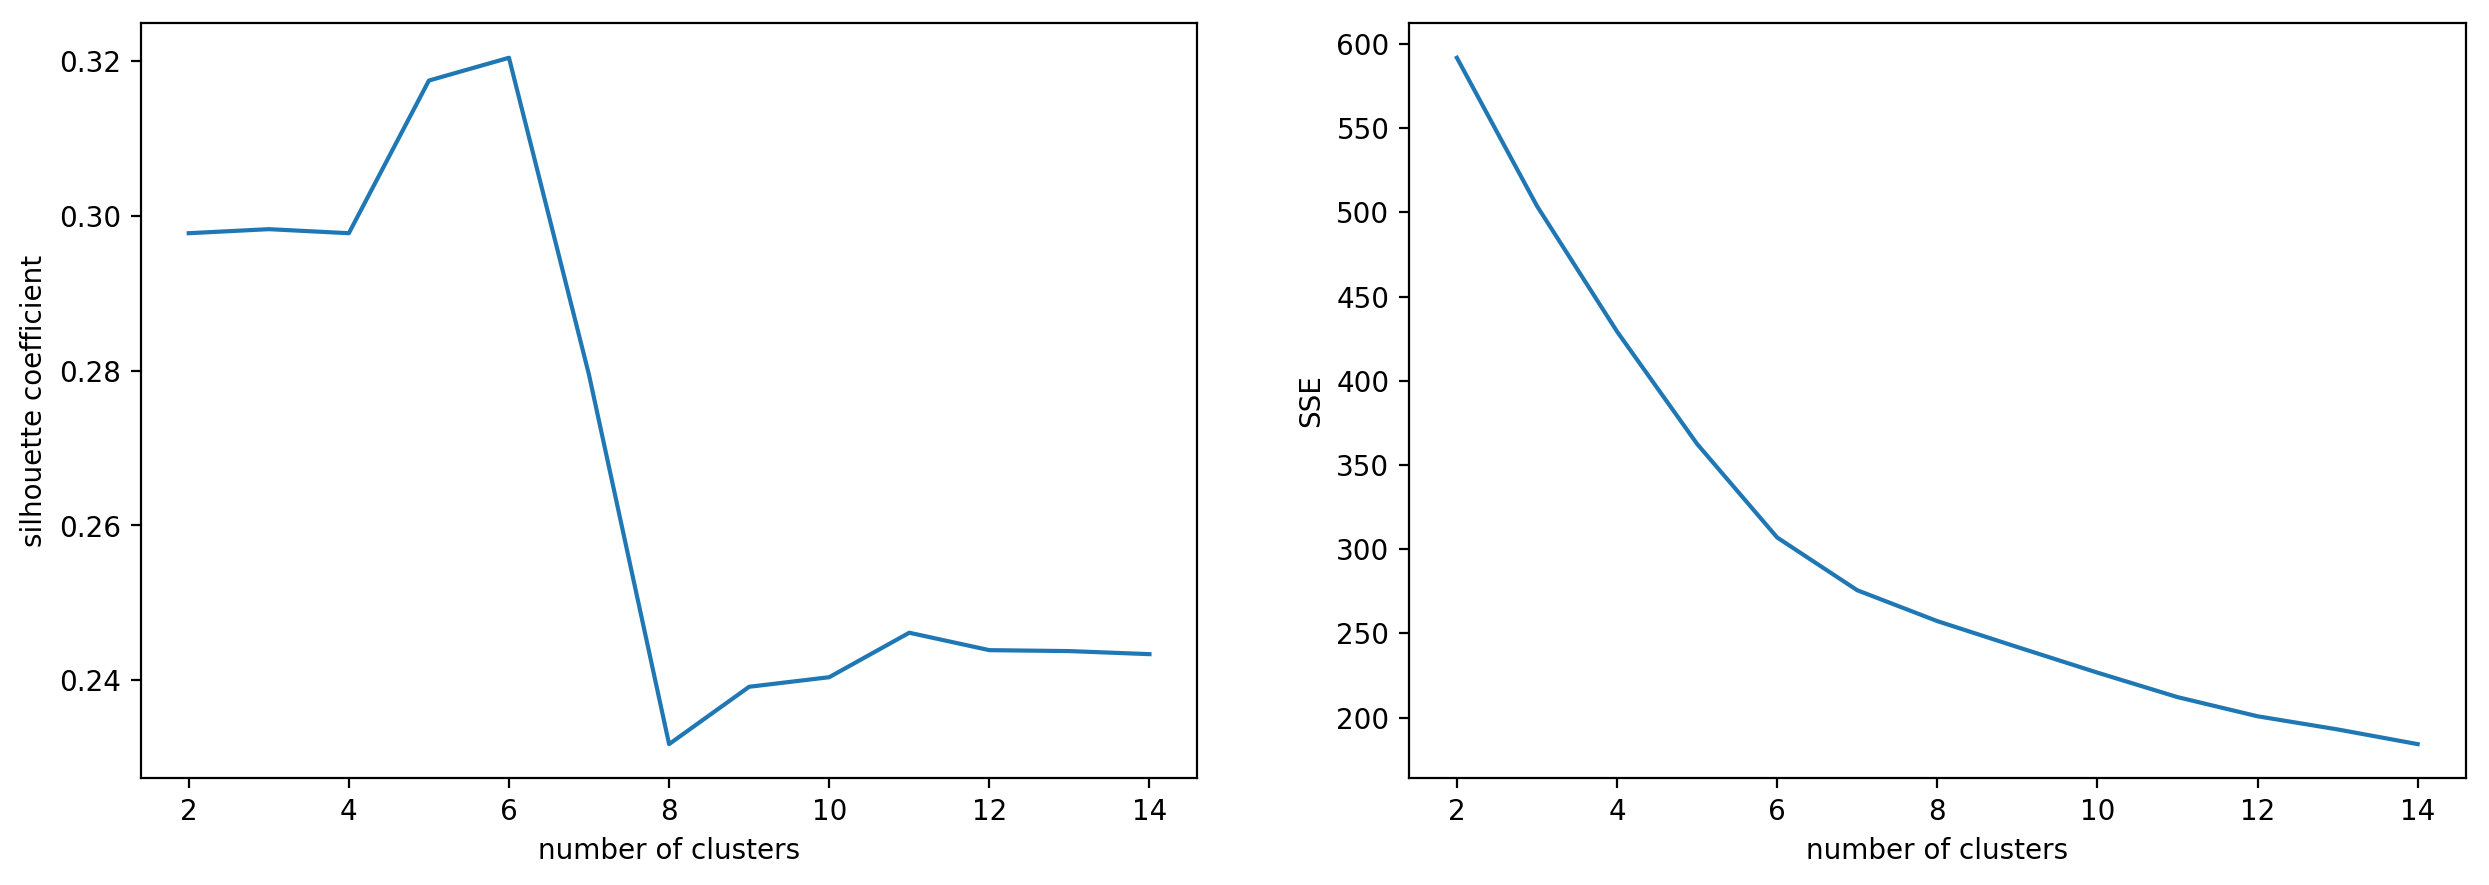

In [662]:
sillhouette_plot(nmf_cv_data)

In [429]:
topic0prob = sorted(nmf_cv_data[:, 0], reverse = True)

In [703]:
def get_indicies(topic, num):
    indicies = 0
    topic0prob = []
    for index, prob in enumerate(lsa_tfidf_data[:, topic],0):
        topic0prob.append([index,prob])
    topic0prob.sort(key=lambda x: x[1], reverse=True)
    indicies = [item[0] for item in topic0prob]
    indicies = indicies[0:10]
    for index in indicies:
        print(token_df['formatted_comment'][index])
        print("")
        
    
    
    

In [477]:
topic0ind = get_indicies(0,10)

In [903]:
km = KMeans(n_clusters=6)
tfidf_clusts = km.fit_predict(scaled_tfidf_data)

In [899]:
tfidf_labels = km.labels_

In [921]:
tsne=TSNE(perplexity=80)
X_ne_tfidf = tsne.fit_transform(scaled_tfidf_data)

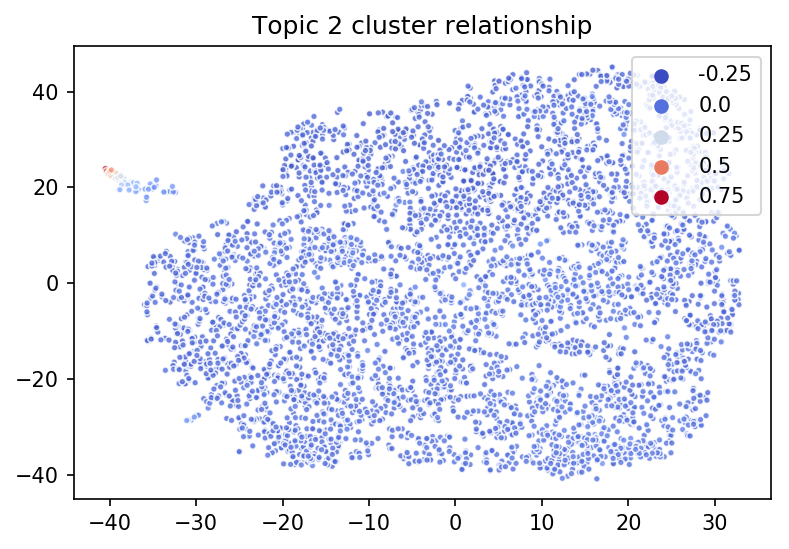

In [938]:
plt.figure(dpi=150)
sns.scatterplot(X_ne_tfidf[:, 0], X_ne_tfidf[:, 1], hue=lsa_tfidf_data[:, 2], palette ='coolwarm', alpha=0.8, s = 10);
#plt.clim(-0.5, 9.5)
plt.legend(loc='upper right')
plt.title('Topic 2 cluster relationship')
plt.savefig('/Users/harmsway/github/intrepreting_creative_writing/topic2.png', format='png', dpi=1000, bbox_inches="tight", orientation='landscape', transparent=True)

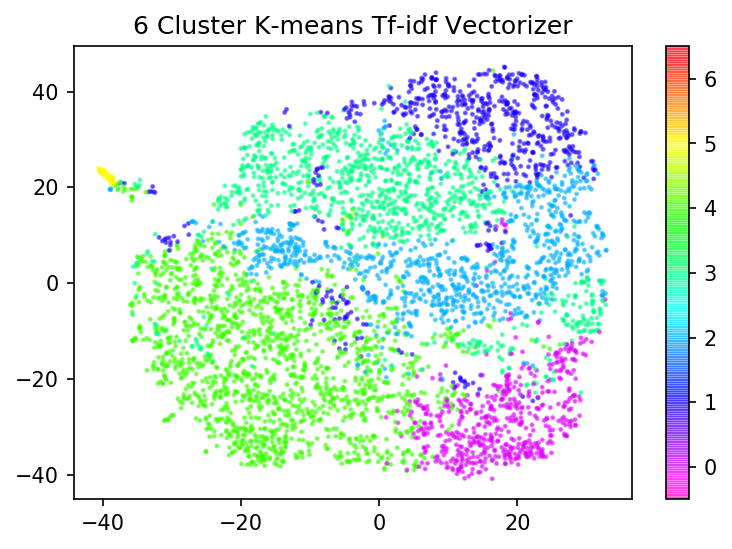

In [922]:
plt.figure(dpi=150)

plt.scatter(X_ne_tfidf[:, 0], X_ne_tfidf[:, 1], c=tfidf_labels, cmap='gist_rainbow_r', alpha=0.5, s = 2);
plt.clim(-0.5, 6.5)
plt.colorbar()
plt.title('6 Cluster K-means Tf-idf Vectorizer')
plt.savefig('/Users/harmsway/github/intrepreting_creative_writing/kmeans.png', format='png', dpi=1000, bbox_inches="tight", orientation='landscape', transparent=True)

### Topic Visulization

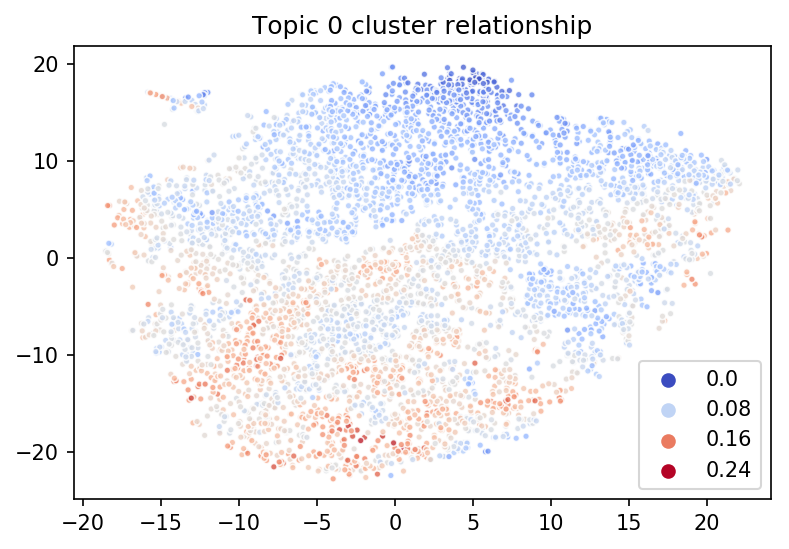

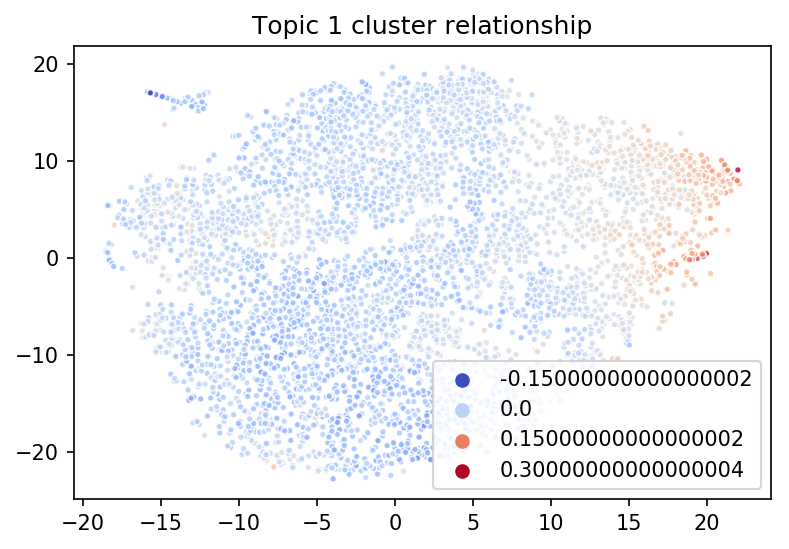

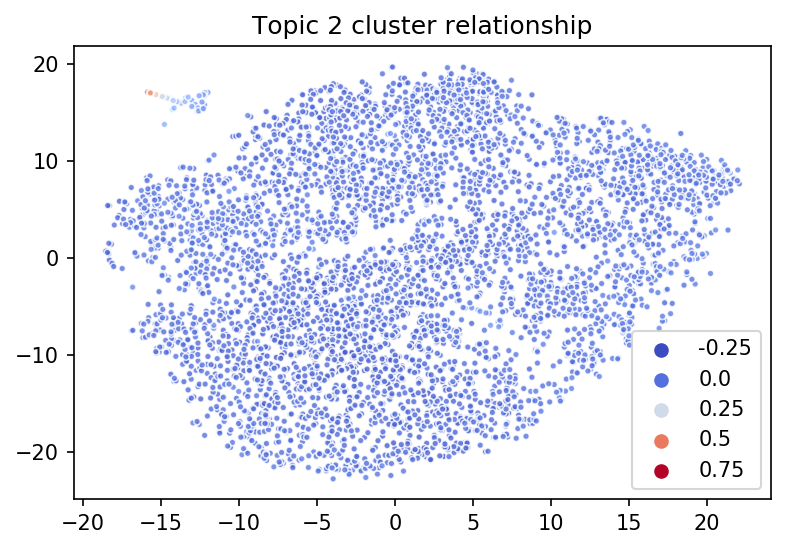

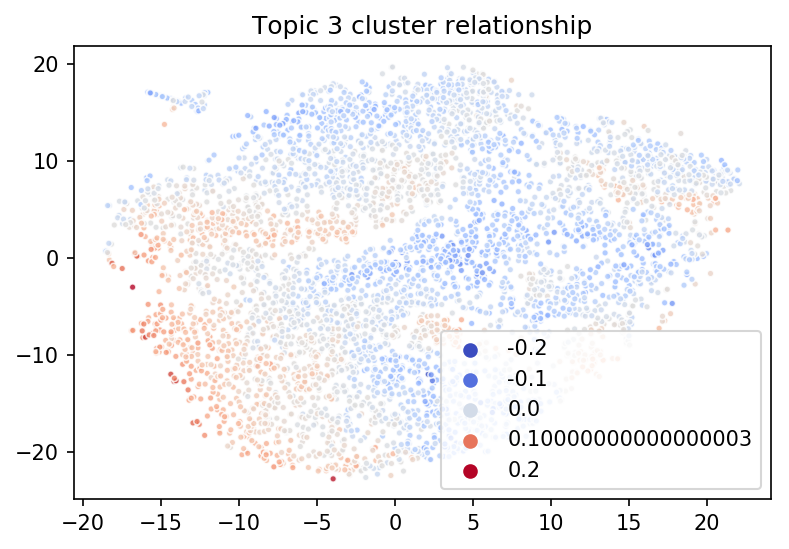

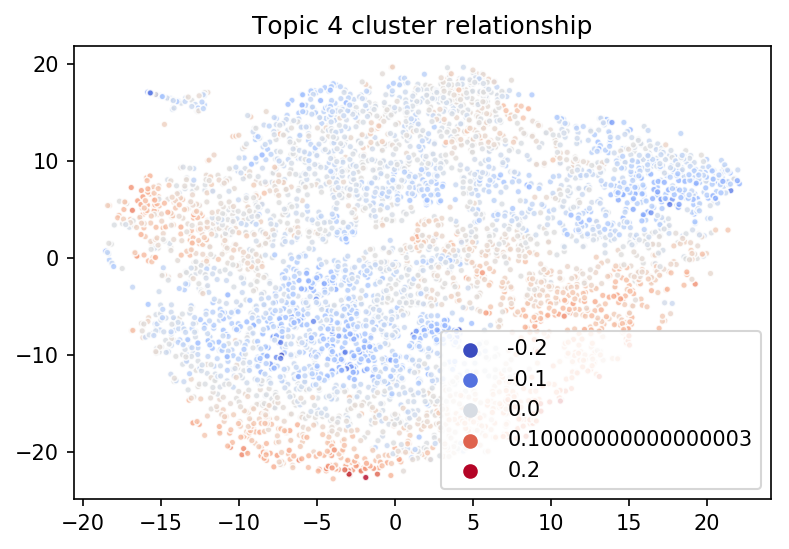

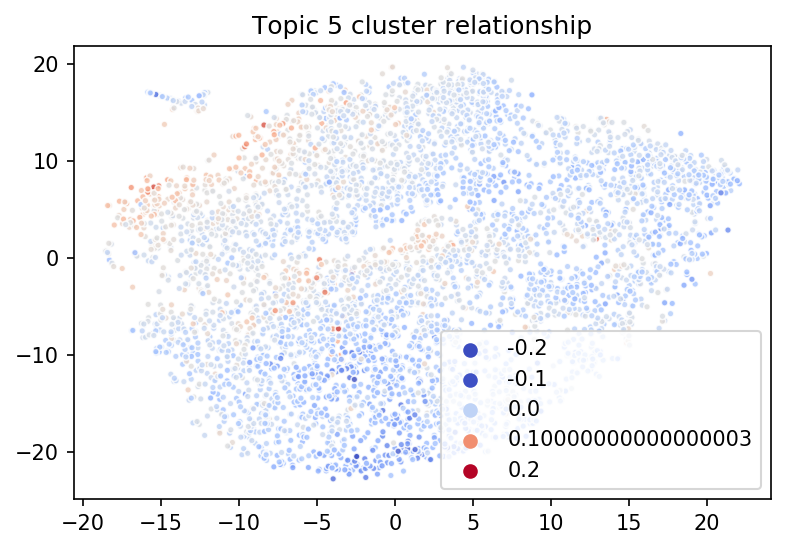

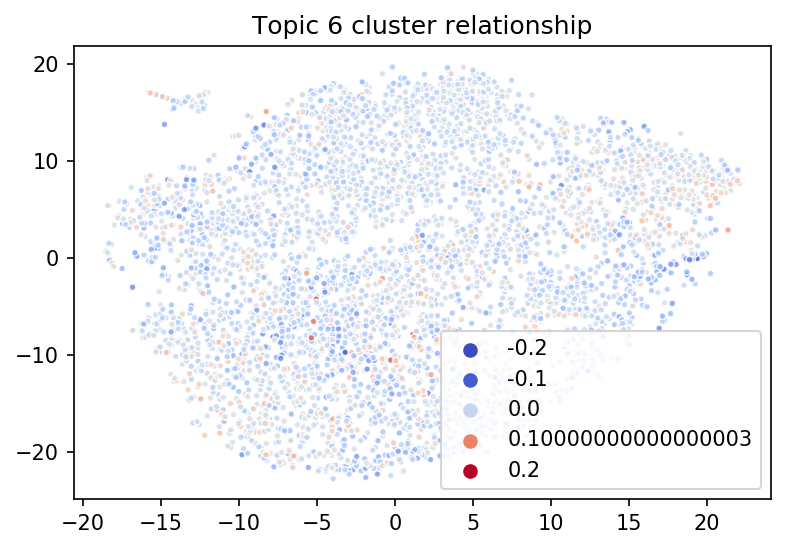

In [915]:
for topic in range(7):
    plt.figure(dpi=150)
    sns.scatterplot(X_ne_tfidf[:, 0], X_ne_tfidf[:, 1], hue=lsa_tfidf_data[:, topic], palette ='coolwarm', alpha=0.8, s = 10);
    #plt.clim(-0.5, 9.5)
    plt.title('Topic {} cluster relationship'.format(topic))

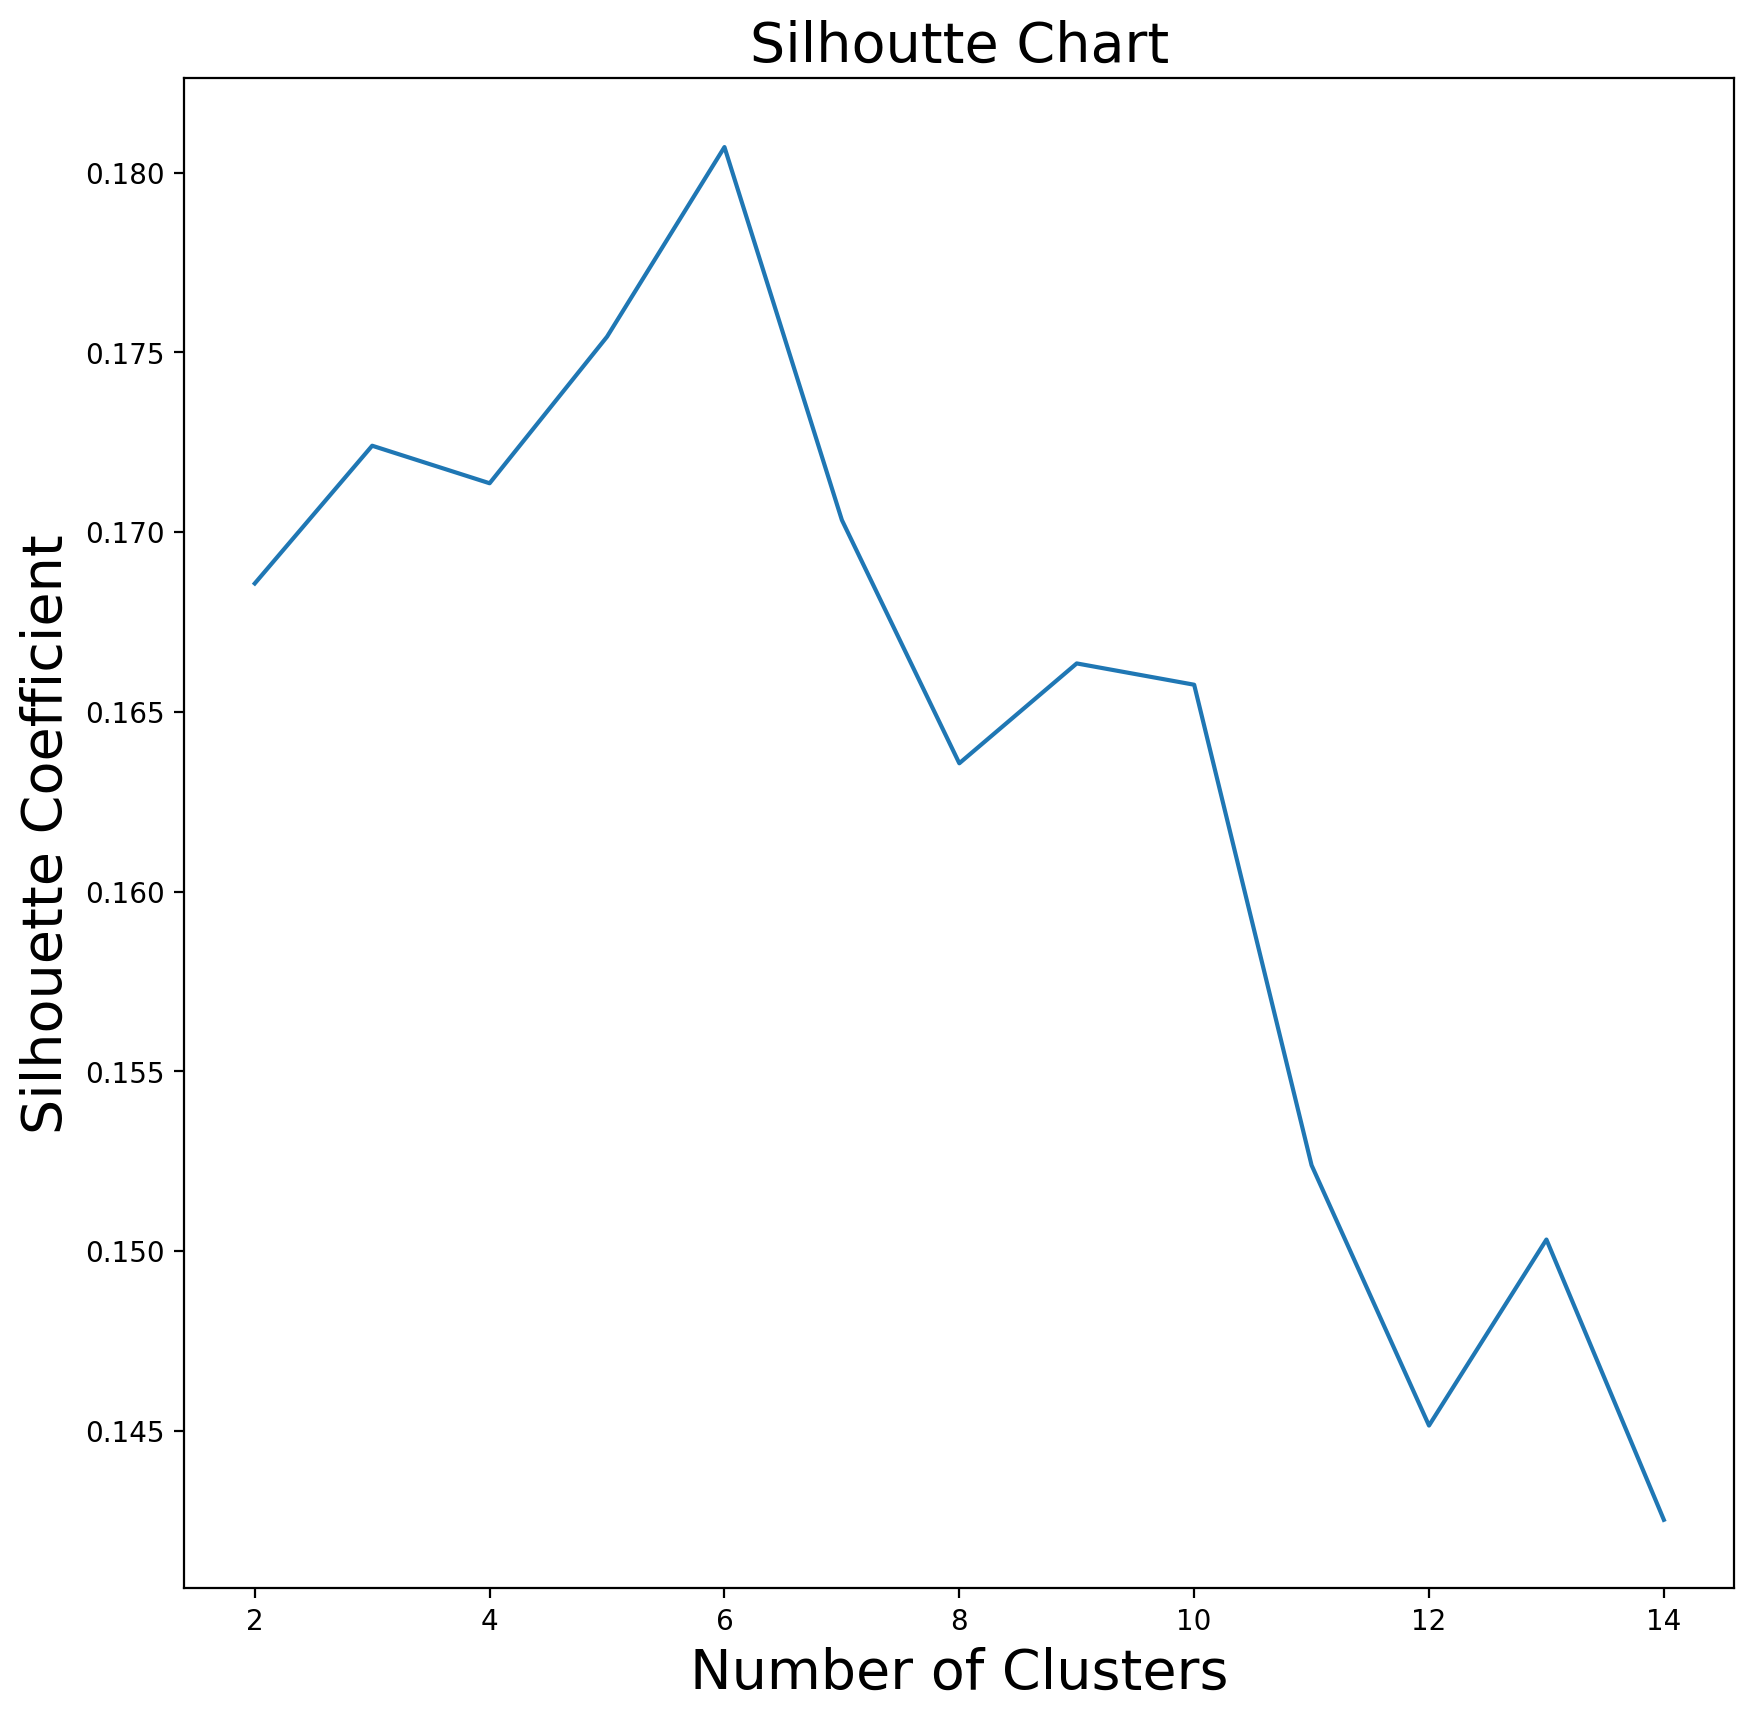

In [934]:
SSEs = []
Sil_coefs = []
for k in range(2,15):
    km = KMeans(n_clusters=k, random_state=17)
    km.fit(scaled_tfidf_data)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(X, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 
fig, ax1 = plt.subplots(1, figsize=(10,10), dpi=200)
k_clusters = range(2,15)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('Number of Clusters', fontsize=20)
ax1.set_ylabel('Silhouette Coefficient', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax1.set_title('Silhoutte Chart',fontsize=20)
plt.savefig('/Users/harmsway/github/intrepreting_creative_writing/silhoutte.png', format='png', dpi=150, bbox_inches="tight", transparent=True)

In [893]:
tfidf_clust_centroid = km.cluster_centers_

In [897]:
km.cluster_centers_

array([[ 9.30443149e-01, -5.21571318e-01, -2.87029536e-01,
         9.88030538e-01, -1.13418874e+00,  5.56241149e-01],
       [-3.76663942e-01, -2.45296938e-01, -2.08445455e-01,
        -9.24915838e-01, -1.81276909e-01, -8.64347059e-01],
       [ 5.89519118e-01, -2.56080131e+00,  1.39308829e+01,
        -1.82374385e+00, -1.87285475e+00,  1.07429377e+00],
       [-1.50000198e+00,  1.42664349e-01, -6.98521086e-03,
        -2.22536961e-01,  1.40376473e-01, -8.69052789e-02],
       [ 2.84428342e-01,  3.08544120e-02,  1.46348321e-01,
         6.78152741e-01,  5.31814870e-01, -2.01016779e+00],
       [ 1.26309474e+00, -1.05026288e+00, -2.66068173e-01,
        -2.03561055e-01,  1.22440356e+00,  1.77692130e+00],
       [ 1.08769819e-01, -1.04440854e+00,  5.85622065e+00,
        -8.27787694e-01, -6.92609821e-01,  1.14543142e-01],
       [-4.64210946e-01, -1.76532573e-03, -6.25913291e-03,
         7.04303067e-01, -4.96400778e-01, -9.99631606e-02],
       [ 1.03583489e+00, -8.06489746e-01, -4.034

In [827]:
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2, axis=1)
    return np.argmin(dist_2)

In [831]:
closest_node(tfidf_clust_centroid[0],scaled_tfidf_data)

1072

In [881]:
from sklearn.metrics import pairwise_distances_argmin_min

In [904]:
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, scaled_tfidf_data)

In [905]:
closest

array([1072, 1080, 4496, 4745, 4198,  394])

In [890]:
lsa_tfidf_data

array([[ 9.70214325e-02, -1.48401004e-02,  8.75064838e-02, ...,
        -2.82292378e-03,  4.43495685e-02,  1.31795823e-02],
       [ 8.76296148e-02, -1.26060021e-02,  4.69573791e-05, ...,
         1.78405245e-02,  3.96521784e-02,  1.52011111e-02],
       [ 9.10873182e-02, -5.27136500e-03,  2.86847724e-03, ...,
        -6.24701062e-03,  7.97163556e-03,  3.34046597e-03],
       ...,
       [ 1.23112838e-01,  6.43209153e-03, -6.00350773e-03, ...,
        -9.20227568e-03, -2.02077947e-02,  2.06142164e-02],
       [ 9.37138476e-02, -3.60250233e-03, -3.41916899e-03, ...,
        -5.51750022e-03,  1.82197124e-04,  1.54834940e-02],
       [ 9.28367957e-02, -2.47236719e-03, -7.74121879e-03, ...,
        -2.09951062e-02, -1.18578921e-02,  8.85467431e-03]])

### Centroid Analysis

In [923]:
for x in range(6):
    print('cluster {}'.format(x))
    print(token_df['prompt'][closest[x]],token_df['formatted_comment'][closest[x]])
    print('')

cluster 0
[WP] Due to a genie mixup, you DON'T have immortality, but "IM mortality," which is Latin for "999 lives." Since you'll still age normally, you live a very reckless life - you have lives to spare. with a jolt, my senses return to me.which one is it now? 298? 299? i would have lost count, were it not for the tattoo etched into my skin, just on my left wrist, reminding me how many id used. i can feel the slight prickling sensation as the number changes. thats always the first thing i feel.then, the rest. pain racks my body, but it fades, replaced with a sweet euphoria i could never get enough of. i reach up, grasping the handle of the blade sunk into my gut, sliding it free. i dont feel a thing as the tip withdraws from my body, suspended over the open wound.the hole in my stomach, once oozing and wet with blood, begins to seal up, almost like magic. the blood doesnt disappear, but my skin just goes back to how it was: smooth and immaculate.the genie had really messed up when i

- Cluster 0: Immortality, Mortality
- Cluster 1: Old Age, slow
- Cluster 2: Music, magic
- Cluster 3: Working, Jobs
- Cluster 4: Evil Forces (Emus taking over the world)
- Cluster 5: Harry Potter (Killing Dursleys) 

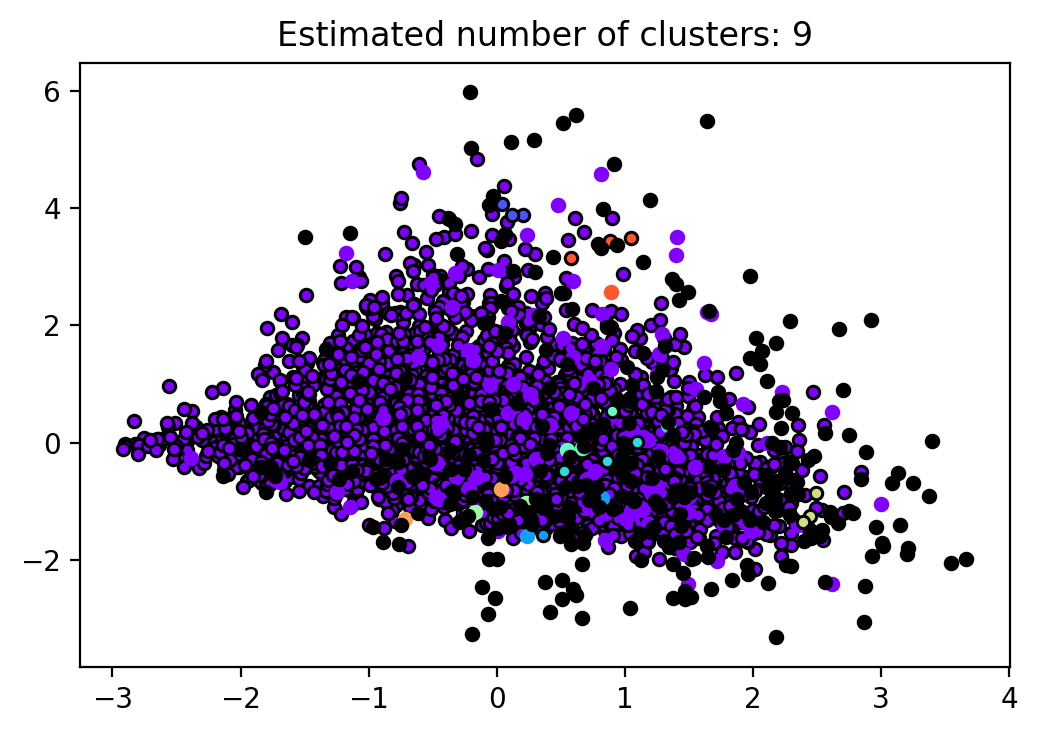

In [744]:
X = scaled_tfidf_data
db = DBSCAN(eps=1, min_samples=3).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
plt.figure(dpi=200)
show_core = True
show_non_core = True
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)
    if show_core:
        xy = X[class_member_mask & core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, edgecolors='k',  s=20, linewidths=1.1)
    
    if show_non_core:
        xy = X[class_member_mask & ~core_samples_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, s=20, linewidths=1.1)

plt.title('Estimated number of clusters: %d' % n_clusters_);

In [767]:
import seaborn as sns

In [ ]:
plt.figure(dpi=300)

n_clusters = 60
km = KMeans(n_clusters = n_clusters)
km.fit(lsa_cv_data)
    
plt.scatter(lsa_cv_sne[:, 0], lsa_cv_sne[:, 1],c=km.labels_, alpha=0.5)
plt.title('tSNE on topic space');